# Simple linear regression
    - Obtain time series data for T and O2
    - Perform simple linear regression with time
    - Fill in the code in the region marked by #==============

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# it needs a package called openpyxl
from sklearn import linear_model
from scipy.stats import t

In [2]:
df=pd.read_excel('https://o2.eas.gatech.edu/Itoetal_GRL_2017/Itoetal_GRL_Fig1.xlsx',\
                skiprows=3)

In [3]:
#df

In [4]:
year = df['YEAR'][1:].to_numpy()
o2=df['Unnamed: 5'][1:].to_numpy() # 0-1000m o2 content in 10^14 mol 
T=df['Unnamed: 10'][1:].to_numpy() # 0-1000m heat content in 10^22 J

Text(0, 0.5, '0-1000m O2 inventory anomaly, 10**14 mol')

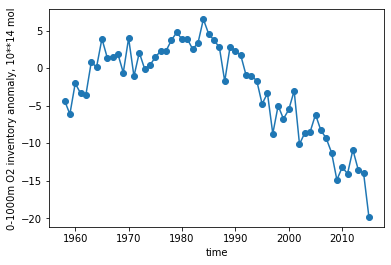

In [5]:
plt.plot(year,o2,'o-')
plt.xlabel('time')
plt.ylabel('0-1000m O2 inventory anomaly, 10**14 mol')

In [ ]:
# 1. simple linear regression
# y = ax + b
# x:year - refyear
# y:o2
x = year - 1958
y = o2
#=============
a = 
b = 
#=============
print(a,b)

In [ ]:
# 2. calculate R2 and 3. plot with line fit
plt.plot(year,o2,'o')
plt.plot(year,a*x+b,'-')
plt.xlabel('time')
plt.ylabel('0-1000m O2 inventory anomaly, 1E+14 mol')
# calculate R2
#==============
r2 = 
#==============
plt.text(1960,-15,'R$^2$ = '+str(np.round(r2,2)),fontsize=14)

In [7]:
# Use scikit-learn to do the same thing
reg = linear_model.LinearRegression()
Nt=np.size(year)
X = np.ones((Nt,2))
X[:,1]=year
reg.fit(X,o2)

LinearRegression()

Text(0, 0.5, '0-1000m O2 inventory anomaly, 10**14 mol')

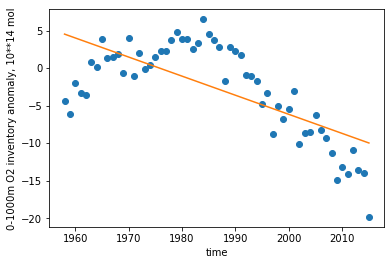

In [8]:
o2est=reg.predict(X)
plt.plot(year,o2,'o')
plt.plot(year,o2est,'-')
plt.xlabel('time')
plt.ylabel('0-1000m O2 inventory anomaly, 10**14 mol')

## uncertainty calculation

In [ ]:
# Calculate the residual
o2est = a*x+b
residual = np.array(y - o2est,dtype=float)
plt.plot(year,residual,'.-')
# calculate lag-1 autocorrelation function
tmp = np.corrcoef(residual[1:],residual[0:-1])
r=tmp[0,1]
print(r)
#
N = np.size(residual)
# 4. calculate effective sample size
#==============
Neff=
#==============
print(N,Neff)

In [ ]:
# 5. calculate mean square error
#==============
MSE=
#==============
print(MSE)

In [ ]:
# 6. calculate the standard error of the slope
#==============
SEa = 
#==============
print(SEa)

In [ ]:
# 7. calculate the standard error of the intercept
#==============
SEb = 
#==============
print(SEb)

In [ ]:
# 8. calculate t-value with 95% confidence level of slope
alpha = 0.05
df = Neff - 1
#==============
t95 = 
a_hi = 
a_lo = 
#==============
print(a_lo,a,a_hi)

In [ ]:
# 9. calculate t-value with 95% confidence level of intercept
#==============
b_hi = 
b_lo = 
#==============
print(b_lo,b,b_hi)

In [ ]:
# 10. re-plot with confidence interval
o2est=a*x+b
o2est1=a_hi*x+b_hi
o2est2=a_lo*x+b_lo
#
plt.plot(year,o2,'o',label='obs')
plt.plot(year,o2est,'g-',label='trend line')
plt.plot(year,o2est1,'g--',label='95% CI')
plt.plot(year,o2est2,'g--')
plt.xlabel('time')
plt.ylabel('0-1000m O2 inventory anomaly, 10**14 mol')
plt.legend()